# First look at clubs dataset

In [2]:
import sys
sys.path.insert(0, r'..\src\data')
import ftb_clubs_wrangle as ftb
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.expand_frame_repr', False)

In [3]:
fulldata = ftb.get_master("fulldata")
fulldata.info()

Fetching C:\Users\adeacon\Google Drive\projects\data\master/ftb_fulldata.txt


C:\Users\adeacon\Documents\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290074 entries, 0 to 290073
Data columns (total 92 columns):
Unnamed: 0               290074 non-null int64
Attendance               9326 non-null float64
BookingPoints            9330 non-null float64
BookingPointsOpp         9330 non-null float64
Corners                  110686 non-null float64
CornersOpp               110686 non-null float64
Country                  290074 non-null object
Date                     290074 non-null object
Div                      290074 non-null object
Fouls                    109918 non-null float64
FoulsOpp                 109918 non-null float64
Goals                    290070 non-null float64
Goals1stHalf             250396 non-null float64
Goals1stHalfOpp          250396 non-null float64
GoalsOpp                 290070 non-null float64
HomeAway                 290074 non-null object
Offsides                 9314 non-null float64
OffsidesOpp              9314 non-null float64
RedCards               

In [4]:
fulldata.HomeAway.value_counts()

Home    145037
Away    145037
Name: HomeAway, dtype: int64

Note this dataset double counts matches because each match will occur as "Home" and "Away" entries.

In [5]:
pd.crosstab(fulldata.Season, fulldata.Country, margins=True)

Country,Belgium,England,France,Germany,Greece,Holland,Italy,Portugal,Scotland,Spain,Turkey,All
Season,,,,,,,,,,,,
1993-1994,0,2372,760,1372,0,612,612,0,0,760,0,6488
1994-1995,0,2516,760,1224,612,612,612,612,720,760,612,9040
1995-1996,612,2368,760,1224,612,612,612,612,720,924,612,9668
1996-1997,612,2314,1684,1224,612,612,612,612,720,1684,612,11298
1997-1998,612,2338,1536,1224,612,612,1372,612,1440,1684,612,12654
1998-1999,612,2264,1372,1224,612,612,1372,612,1440,1684,612,12416
1999-2000,612,2272,1372,1224,612,612,1372,612,1440,1684,612,12424
2000-2001,612,3126,1372,0,480,612,1372,612,1536,1684,612,12018
2001-2002,612,3138,612,0,364,612,612,612,1536,760,612,9470


So we clearly have some incomplete data - particularly for early 2000s.

Also the English data has far too volatile count. I suspect my pre-processing is re-arranging the data in unexpected days.

Let's make a note to investigate those issues but carry on with our initial analysis...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010A5C320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011460C18>]], dtype=object)

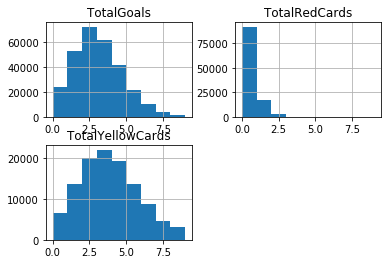

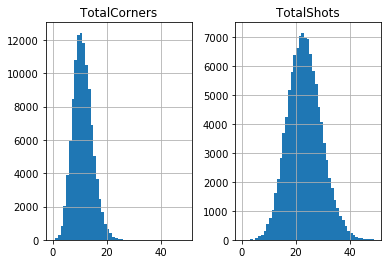

In [26]:
plt.figure();
fulldata.hist(column=["TotalGoals", "TotalYellowCards", "TotalRedCards"], bins=range(10))
fulldata.hist(column=["TotalShots", "TotalCorners"], bins=range(50))
# fulldata.hist(column=["TotalRedCards"], bins=range(10))

In [30]:
fulldata[fulldata.HomeAway=="Home"].Result.value_counts(normalize=True)

Win     0.457456
Loss    0.274613
Draw    0.267932
Name: Result, dtype: float64

## Spot checks on Ajax

Let's take Ajax as an example and check that their season performances do match those here https://en.wikipedia.org/wiki/List_of_AFC_Ajax_seasons

In [35]:
group_key = "Season"
base_filters = {
        "Team": ["Ajax"]
        }
output_metrics = [
        "NumberOfMatches",
        "Win", "Draw", "Loss",
        "Goals", "GoalsOpp", 
        ]
ajax = ftb.get_summary(group_key, df=None, base_filters=base_filters, 
                       output_metrics=output_metrics, agg_method=sum)
print ajax

Fetching C:\Users\adeacon\Google Drive\projects\data\master/ftb_fulldata.txt
           NumberOfMatches  Win  Draw  Loss  Goals  GoalsOpp  GoalsDiff  Points
1993-1994               34   26     2     6   86.0      26.0       60.0      80
1994-1995               34   27     7     0  106.0      28.0       78.0      88
1995-1996               34   26     5     3   97.0      24.0       73.0      83
1996-1997               34   17    10     7   55.0      31.0       24.0      61
1997-1998               34   29     2     3  112.0      22.0       90.0      89
1998-1999               34   16     9     9   73.0      41.0       32.0      57
1999-2000               34   18     7     9   72.0      51.0       21.0      61
2000-2001               34   18     7     9   85.0      43.0       42.0      61
2001-2002               34   22     7     5   73.0      34.0       39.0      73
2003-2004               34   25     5     4   79.0      31.0       48.0      80
2005-2006               34   18     6    10

So (pretty much it all matches up. Missing seasons are 2002-2003, 2004-2005, 2007-2008. Also curiously we're missing one game from 2010-2011 - a 3-1 win?

## Spot checks on Frankfurt

Let's take Eintracht Frankfurt as a second example and check them out versus https://en.wikipedia.org/wiki/List_of_Eintracht_Frankfurt_seasons

In [44]:
group_key = "Season"
base_filters = {
        "Team": ["Ein Frankfurt"]
        }
output_metrics = [
        "NumberOfMatches",
        "Win", "Draw", "Loss",
        "Goals", "GoalsOpp", 
        ]
frankfurt = ftb.get_summary(group_key, df=fulldata.copy(), base_filters=base_filters, 
                       output_metrics=output_metrics, agg_method=sum)
print frankfurt

           NumberOfMatches  Win  Draw  Loss  Goals  GoalsOpp
1993-1994               34   15     8    11   57.0      41.0
1994-1995               34   12     9    13   41.0      49.0
1995-1996               34    7    11    16   43.0      68.0
1996-1997               34   13     9    12   43.0      46.0
1997-1998               34   17    13     4   50.0      32.0
1998-1999               34    9    10    15   44.0      54.0
1999-2000               34   12     5    17   42.0      44.0
2005-2006               34    9     9    16   42.0      51.0
2006-2007               34    9    13    12   46.0      58.0
2007-2008               34   12    10    12   43.0      50.0
2008-2009               34    8     9    17   39.0      60.0
2009-2010               34   12    10    12   47.0      54.0
2010-2011               34    9     7    18   31.0      49.0
2011-2012               34   20     8     6   76.0      33.0
2012-2013               34   14     9    11   49.0      46.0
2013-2014               

Again, it's mostly spot-on. This time missing years are 2000-2001, 2001-2002, 2002-2003, 2003-2004, 2004-2005, and in 2010-2011 we have 3 extra goals conceded appearing!

## Mapping the data

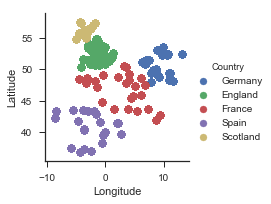

In [57]:
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

mapdata=fulldata.dropna(subset=['Latitude', 'Longitude'])
# mapdata.info()
fg = seaborn.FacetGrid(data=mapdata, hue='Country', aspect=1.)
fg.map(pyplot.scatter, 'Longitude', 'Latitude').add_legend()